In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Data

In [2]:
import os 
import glob
pd.set_option("display.float_format", lambda x: "%.3f" % x)

all_files = glob.glob("*.csv")

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    print(df.shape)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.shape

#df.shape

2019-Dec.csv
(3533286, 9)
2019-Nov.csv
(4635837, 9)
2019-Oct.csv
(4102283, 9)
2020-Feb.csv
(4156682, 9)
2020-Jan.csv
(4264752, 9)


(20692840, 9)

In [3]:
frame.shape

(20692840, 9)

In [4]:

frame.event_type.unique()

array(['remove_from_cart', 'view', 'cart', 'purchase'], dtype=object)

In [5]:
frame = frame[(frame["price"] > 0) & (frame["event_type"] == "purchase") ]

frame = frame.dropna(subset=["brand", "price", "product_id","category_code","event_time"])


frame['event_time'] = pd.to_datetime(frame['event_time']).dt.date

frame2 = frame.groupby(['event_time'], as_index=False)['price'].sum()
frame2["event_time"] = pd.to_datetime(frame2["event_time"]).dt.strftime("%Y%m%d")
frame3 = frame2
#df2.shape
frame2.shape
print(frame2.head())

  event_time    price
0   20191001 1579.360
1   20191002 1154.680
2   20191003 1665.510
3   20191004 1213.050
4   20191005  862.860


In [6]:
label = frame2["price"]
data = frame2.drop(columns=["price"])
print(frame2.head())

  event_time    price
0   20191001 1579.360
1   20191002 1154.680
2   20191003 1665.510
3   20191004 1213.050
4   20191005  862.860


In [7]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaled_features = scaler1.fit_transform(frame3)

In [8]:
from sklearn.neighbors import LocalOutlierFactor
# Aplicar LOF (Local Outlier Factor)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
frame3['anomaly_score'] = lof.fit_predict(scaled_features)

# Ver numero de elementos de cada cluster
anomaly = frame3[frame3['anomaly_score'] == -1].shape[0]
normal = frame3[frame3['anomaly_score'] == 1].shape[0]

print("Número de datos normales:", normal)
print("Número de datos anomalos:", anomaly)

Número de datos normales: 150
Número de datos anomalos: 2


In [14]:
frame2

,event_time,price,anomaly_score
0,20191001,1579.360,1
1,20191002,1154.680,1
2,20191003,1665.510,1
3,20191004,1213.050,1
4,20191005,862.860,1
...,...,...,...
147,20200225,2024.900,1
148,20200226,1501.420,1
149,20200227,908.370,1
150,20200228,1587.170,1


In [10]:
from sklearn.decomposition import PCA

# Reducir las dimensiones a 2D PCA para poder graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

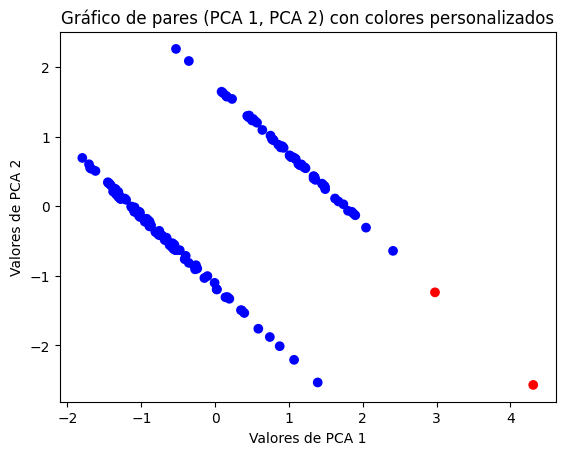

In [11]:
# Graficar
# Asignar colores basados en el array colors
color_map = np.array(['blue' if v == 1 else 'red' for v in frame3['anomaly_score']])

# Crear la gráfica
plt.scatter(X_pca[:, 0], X_pca[:, 1], color=color_map)

# Agregar etiquetas y título
plt.xlabel('Valores de PCA 1')
plt.ylabel('Valores de PCA 2')
plt.title('Gráfico de pares (PCA 1, PCA 2) con colores personalizados')

# Mostrar la gráfica
plt.show()

In [15]:
#Eliminar datos anomalos
frame2 = frame3[(frame3 != -1).all(axis=1)]
frame2
label = frame2["price"]
frame2.shape

(150, 3)

In [16]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()



frame2 = pd.DataFrame(scaler.fit_transform(frame2), columns=frame2.columns)


In [17]:
# Generate train and test datasets'
from sklearn.model_selection import train_test_split

X = frame2
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

X_train.head()

,event_time,price,anomaly_score
11,0.001,0.307,0.000
1,0.000,0.327,0.000
109,0.988,0.202,0.000
126,0.998,0.315,0.000
30,0.003,0.387,0.000


In [18]:
# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Explained Variance Score: ", explained_variance_score(y_test, y_pred))


Mean Squared Error:  1.34416849539867e-25
R2 Score:  1.0
Mean Absolute Error:  2.5769016550232966e-13
Explained Variance Score:  1.0


In [19]:
# Train a Decision Tree Regressor model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

model2 = XGBRegressor()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Explained Variance Score: ", explained_variance_score(y_test, y_pred))


Mean Squared Error:  509.33907497000587
R2 Score:  0.996574811254312
Mean Absolute Error:  16.802401936848963
Explained Variance Score:  0.9982170540425486


In [20]:
# Train a Neural Network model
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

model3 = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # One hidden layer with 100 neurons
    activation="relu",  # 'relu' activation function
    solver="adam",  # 'adam' solver for weight optimization
    max_iter=500,  # Set the number of iterations (epochs)
    random_state=42,  # Set the seed for reproducibility
)
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Explained Variance Score: ", explained_variance_score(y_test, y_pred))

Mean Squared Error:  97118.44255980643
R2 Score:  0.3469006938566701
Mean Absolute Error:  253.7584838972747
Explained Variance Score:  0.5555154035841787


c:\Users\arriaga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
# Compare y_pred and y_test
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred)

df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
df["diff"] = df["y_test"] - df["y_pred"]

df.head(10)

,y_test,y_pred,diff
0,1206.810,921.027,285.783
1,1235.490,935.101,300.389
2,1339.900,959.393,380.507
3,2039.410,1717.001,322.409
4,2411.050,1824.241,586.809
5,1011.450,864.804,146.646
6,1539.340,1566.346,-27.006
7,1747.110,1633.333,113.777
8,1383.430,972.383,411.047
9,1392.530,975.795,416.735
